In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\hack2-hr\train.csv")
test=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\hack2-hr\test.csv")

In [3]:
train.shape,test.shape

((18359, 14), (15021, 13))

In [4]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [5]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


In [6]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [7]:
(train.isna().sum()/train.shape[0]*100).sort_values()

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
experience                 0.321368
enrolled_university        1.862847
last_new_job               1.999020
education_level            2.489242
major_discipline          15.458358
gender                    22.321477
company_size              26.030830
company_type              27.447029
dtype: float64

In [8]:
train.duplicated().sum()

0

In [9]:
train.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

In [10]:
train.target.value_counts(normalize=True)*100

target
0    86.79122
1    13.20878
Name: proportion, dtype: float64

<Axes: xlabel='target'>

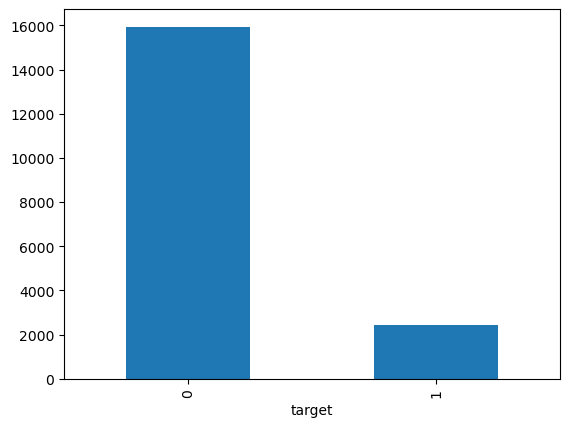

In [11]:
train.target.value_counts().plot(kind ='bar')

In [12]:
tgt_col =['target']
ing_col =['enrollee_id']

In [13]:
train.drop(columns=ing_col).describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


In [14]:
train.describe(include='object').T

,count,unique,top,freq
city,18359,123,city_103,4358
gender,14261,3,Male,12884
relevent_experience,18359,2,Has relevent experience,13596
enrolled_university,18017,3,no_enrollment,13659
education_level,17902,5,Graduate,10769
major_discipline,15521,6,STEM,13738
experience,18300,22,>20,3437
company_size,13580,8,50-99,3120
company_type,13320,6,Pvt Ltd,10051
last_new_job,17992,6,1,7567


In [15]:
train.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [16]:
for col in train.drop(columns=ing_col).columns:
    print(col,train[col].nunique(), "=======", train[col].unique())

city 123 ======= ['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'city_78' 'city_80' 'city_33' 

<Axes: xlabel='training_hours', ylabel='Density'>

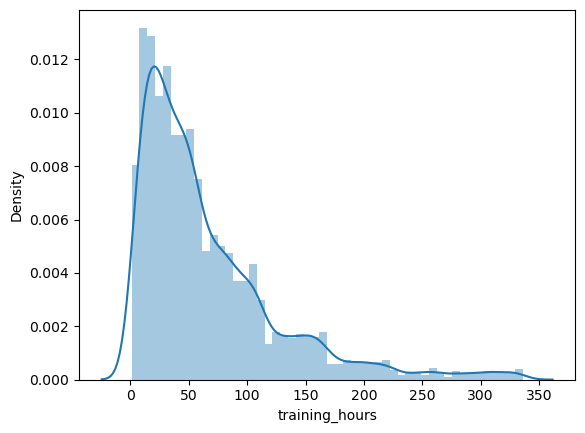

In [17]:
sns.distplot(train.training_hours)

<Axes: xlabel='city_development_index', ylabel='Density'>

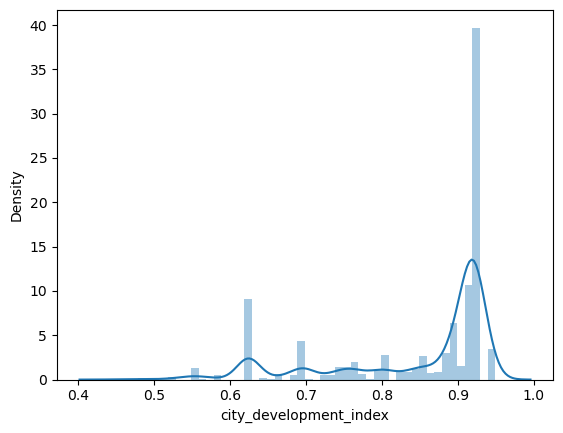

In [18]:
sns.distplot(train.city_development_index)

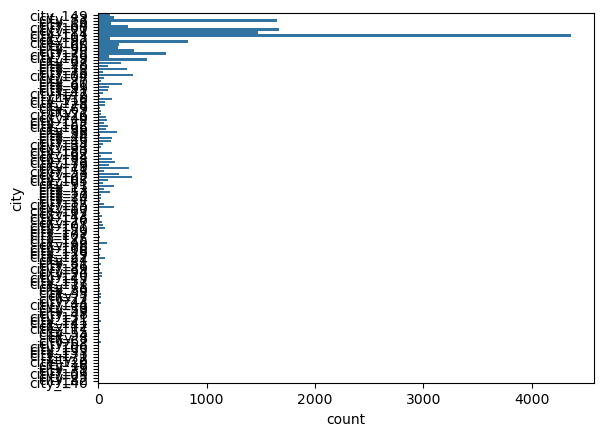

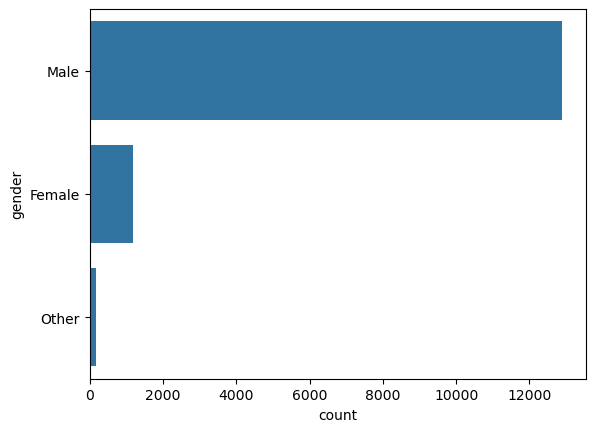

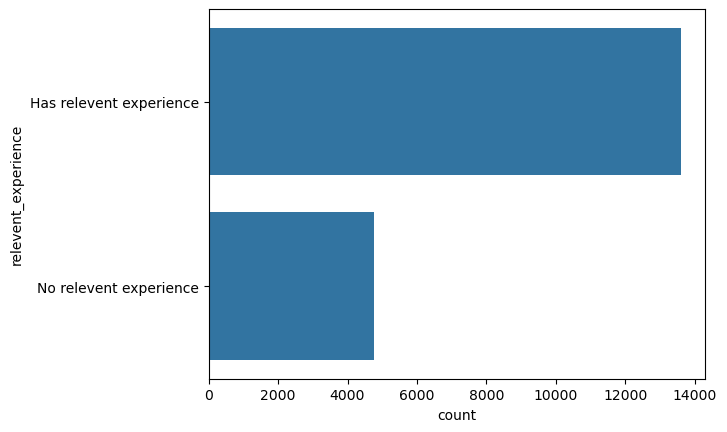

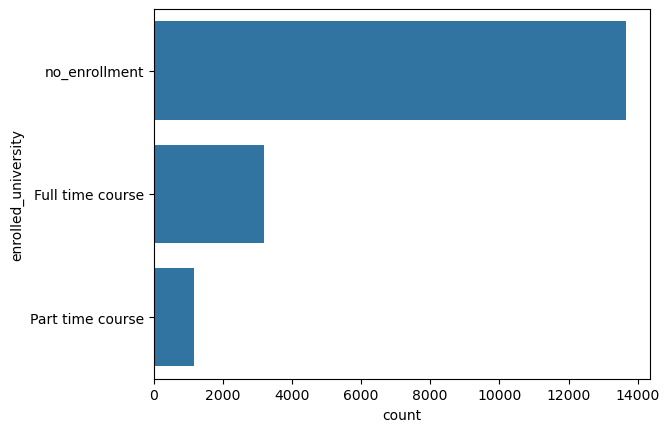

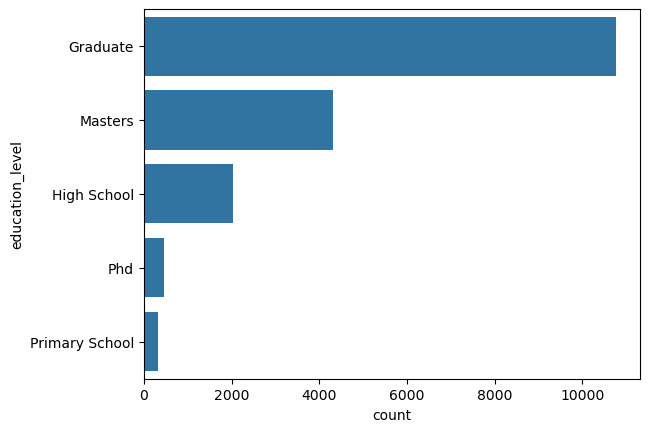

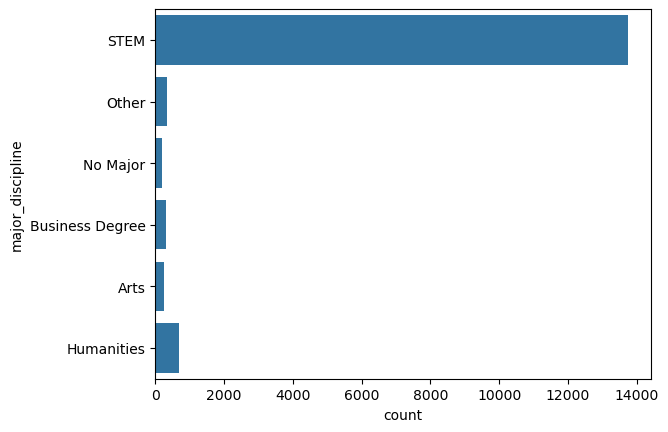

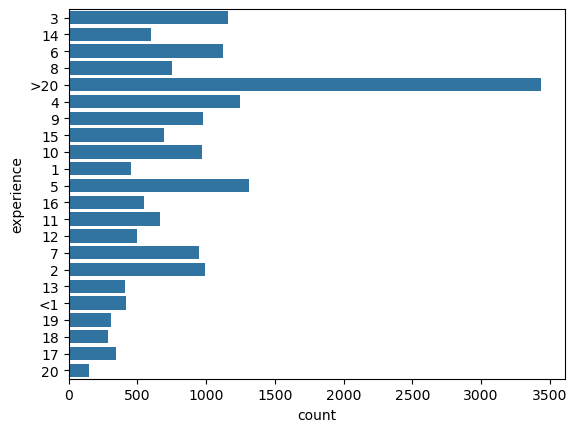

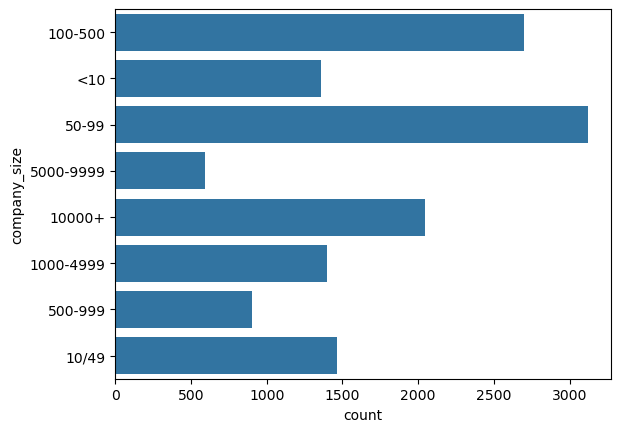

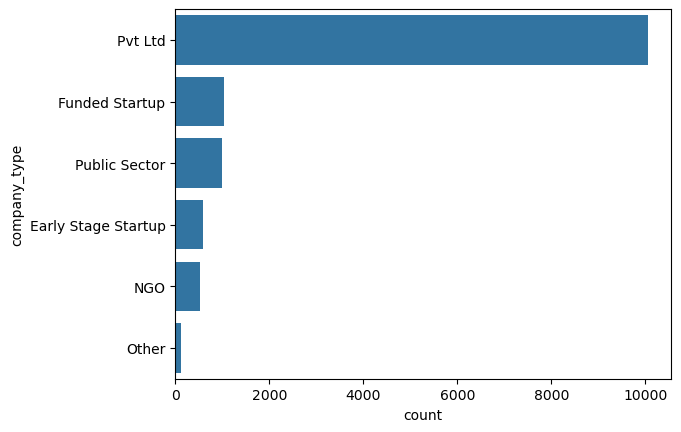

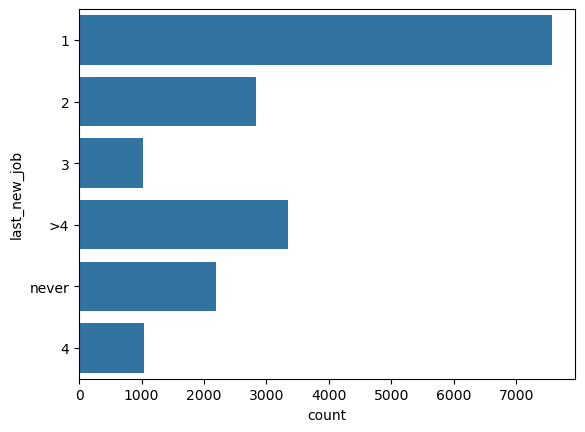

In [19]:
for col in train.select_dtypes(include='object').columns:
    sns.countplot(y=train[col])
    plt.show()

In [20]:
exp_tar =train[['experience','target']].groupby('experience').value_counts().unstack()
exp_tar['%']=exp_tar[1]/(exp_tar[0]+exp_tar[1])*100 
exp_tar.sort_values(exp_tar.columns[2],ascending=False)

target,0,1,%
experience,,,
<1,315,101,24.278846
1,344,108,23.893805
2,821,171,17.237903
4,1039,211,16.880000
3,968,191,16.479724
7,811,139,14.631579
5,1125,184,14.056532
6,972,153,13.600000
14,527,75,12.458472


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [22]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [23]:
cat_cols=['city','gender','relevent_experience','enrolled_university',
          'education_level','major_discipline','experience',
          'company_size','company_type','last_new_job']

num_cols=['city_development_index','training_hours']

In [24]:
cat_pipe_encode=Pipeline(
steps=[
    ('impute_Cat',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
num_pipe_encode=Pipeline(
steps=[
    ('impute_Cat',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

In [26]:
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ])

In [27]:
model_pipeline=Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [28]:
X = train.drop(columns=ing_col+tgt_col)
X.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69


In [29]:
y=train[tgt_col]
y.head(2)

,target
0,0
1,0


In [30]:
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=42,test_size=0.1)
train_X.shape,val_X.shape,train_y.shape,val_y.shape

((16523, 12), (1836, 12), (16523, 1), (1836, 1))

In [31]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression())])

In [32]:
predicted_train_tgt=model_pipeline.predict(train_X)
predicted_val_tgt=model_pipeline.predict(val_X)

In [33]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt=model_pipeline.predict(train_X)
    predicted_val_tgt=model_pipeline.predict(val_X)
    
    print("train auc",roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print("test auc",roc_auc_score(val_y,predicted_val_tgt),sep='\n')
    
    print("train confusion matrix",confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print("test confustion matrix",confusion_matrix(val_y,predicted_val_tgt),sep='\n')
    
    print("train class matrix",classification_report(train_y,predicted_train_tgt),sep='\n')
    print("test class matrix",classification_report(val_y,predicted_val_tgt),sep='\n')
    
    y_pred_proba=model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrshv= roc_curve(val_y,y_pred_proba)
#     roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr)
    plt.show()
    
    
    
    

train auc
0.5019305346679436
test auc
0.50199203187251
train confusion matrix
[[14345     4]
 [ 2165     9]]
test confustion matrix
[[1585    0]
 [ 250    1]]
train class matrix
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     14349
           1       0.69      0.00      0.01      2174

    accuracy                           0.87     16523
   macro avg       0.78      0.50      0.47     16523
weighted avg       0.85      0.87      0.81     16523

test class matrix
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1585
           1       1.00      0.00      0.01       251

    accuracy                           0.86      1836
   macro avg       0.93      0.50      0.47      1836
weighted avg       0.88      0.86      0.80      1836



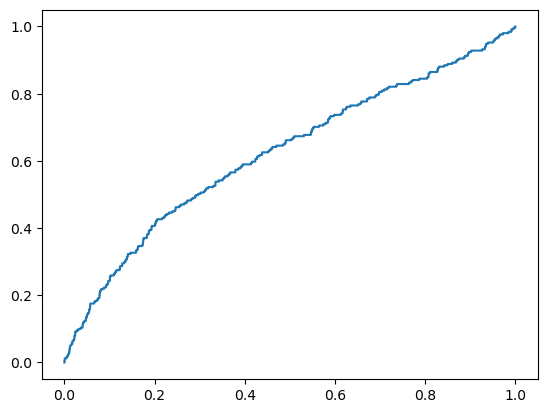

In [34]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [35]:
model_pipeline.predict_proba(val_X)

array([[0.83788855, 0.16211145],
       [0.89245315, 0.10754685],
       [0.9161205 , 0.0838795 ],
       ...,
       [0.88705445, 0.11294555],
       [0.92663684, 0.07336316],
       [0.91339528, 0.08660472]])

In [36]:
model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.16211145, 0.10754685, 0.0838795 , ..., 0.11294555, 0.07336316,
       0.08660472])

In [38]:
param=[
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None] ,
    'model__C':[0.5,3]   
    }
]

In [39]:
grid= GridSearchCV(estimator=model_pipeline,param_grid=param,cv=2,scoring='roc_auc')

In [40]:
grid.fit(train_X,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_Cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',
                                                                          'company_type',
                                                                          'last_new_job']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_Cat',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [41]:
grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}

In [42]:
res_df = pd.DataFrame(grid.cv_results_)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.631020,1
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.617961,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.623310,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.617961,3


In [43]:
sub = pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\hack2-hr\sample_submission.csv")

In [44]:
sub.head(3)

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0


In [45]:
test.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17


In [46]:
train.columns.difference(test.columns)

Index(['target'], dtype='object')

In [47]:
sub['target'] = model_pipeline.predict(test)

In [48]:
sub.to_csv('sub_1.csv',index=False)

In [49]:
sub

,enrollee_id,target
0,16548,1
1,12036,0
2,11061,0
3,5032,0
4,17599,0
...,...,...
15016,11308,0
15017,14612,0
15018,33346,0
15019,14506,0


In [50]:
import joblib

In [51]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [52]:
from imblearn.over_sampling import RandomOverSampler

In [53]:
over_sampling=RandomOverSampler()

In [54]:
import imblearn
imblearn.__version__

'0.12.3'

In [55]:
import sklearn
sklearn.__version__

'1.5.1'

In [56]:
train_y.value_counts()

target
0         14349
1          2174
Name: count, dtype: int64

In [57]:
train_X_os,train_y_os=over_sampling.fit_resample(train_X,train_y)

In [58]:
train_y_os.value_counts()

target
0         14349
1         14349
Name: count, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
param_2=[
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None] ,
    'model__C':[0.5,3] 
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5] ,
    }
]



In [61]:
grid_2= GridSearchCV(estimator=model_pipeline,param_grid=param_2,cv=2,scoring='roc_auc')

In [62]:
grid_2.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_Cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_Cat',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [63]:
grid_2.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}

In [64]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression(C=0.5))])

In [65]:
new_model=grid_2.best_estimator_

In [66]:
res_df = pd.DataFrame(grid_2.cv_results_)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.668099,1
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.667381,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.667861,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.667381,3
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.628755,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.646206,5


train auc
0.6352971813248175
test auc
0.6045709904860055
train confusion matrix
[[9658 4691]
 [ 875 1299]]
test confustion matrix
[[1064  521]
 [ 116  135]]
train class matrix
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     14349
           1       0.22      0.60      0.32      2174

    accuracy                           0.66     16523
   macro avg       0.57      0.64      0.55     16523
weighted avg       0.82      0.66      0.72     16523

test class matrix
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1585
           1       0.21      0.54      0.30       251

    accuracy                           0.65      1836
   macro avg       0.55      0.60      0.53      1836
weighted avg       0.81      0.65      0.71      1836



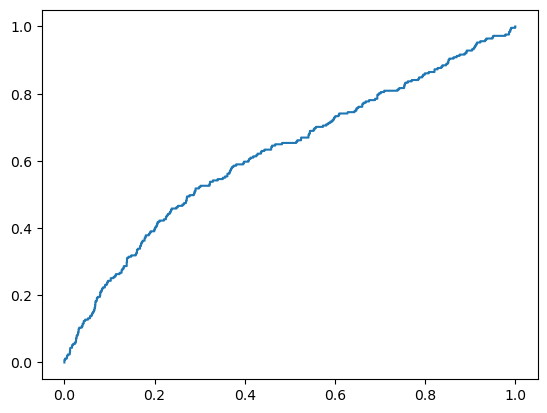

In [67]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

train auc
0.6383720119868981
test auc
0.6045709904860055
train confusion matrix
[[9658 4691]
 [5687 8662]]
test confustion matrix
[[1064  521]
 [ 116  135]]
train class matrix
              precision    recall  f1-score   support

           0       0.63      0.67      0.65     14349
           1       0.65      0.60      0.63     14349

    accuracy                           0.64     28698
   macro avg       0.64      0.64      0.64     28698
weighted avg       0.64      0.64      0.64     28698

test class matrix
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1585
           1       0.21      0.54      0.30       251

    accuracy                           0.65      1836
   macro avg       0.55      0.60      0.53      1836
weighted avg       0.81      0.65      0.71      1836



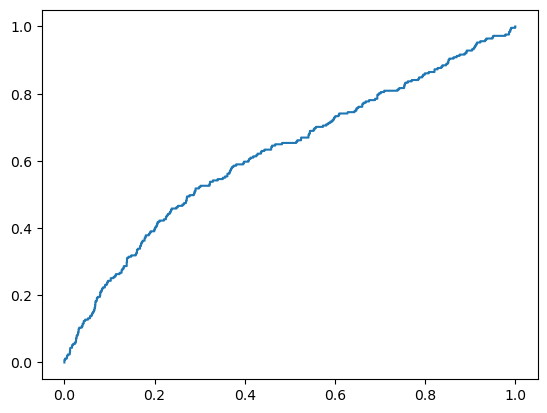

In [68]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

In [69]:
sub['target'] = new_model.predict(test)
sub.to_csv('sub_2.csv',index=False)

In [70]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier

In [71]:
param_3=[
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None] ,
    'model__C':[0.5,3] 
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5] ,
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],
        final_estimator=LogisticRegression()
    )],
    'model__sclf1__max_depth':[4,8] ,
    'model__sclf2__n_estimators':[15,25],  
    'model__sclf3__n_estimators':[3,6],
    },    
]


In [72]:
grid_3 = GridSearchCV(estimator=model_pipeline,param_grid=param_3,cv=2,scoring='roc_auc')

In [73]:
grid_3.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_Cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [3, 6]}],
             scoring='roc_auc')

In [74]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job...
                                                  Pipeline(steps=[('impute_Cat',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=15)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=3)]],
                                    final_estimator=LogisticRegression()))])

In [75]:
res_df = pd.DataFrame(grid_3.cv_results_)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.668099,7
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.667381,9
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.667861,8
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.667381,9
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.628755,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.646177,13
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ...",0.665555,11
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ...",0.663295,12
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ...",0.672979,5
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ...",0.670165,6


In [76]:
new_model_3=grid_3.best_estimator_

train auc
0.6732873370966617
test auc
0.5787625523144018
train confusion matrix
[[10872  3477]
 [ 5899  8450]]
test confustion matrix
[[1159  426]
 [ 144  107]]
train class matrix
              precision    recall  f1-score   support

           0       0.65      0.76      0.70     14349
           1       0.71      0.59      0.64     14349

    accuracy                           0.67     28698
   macro avg       0.68      0.67      0.67     28698
weighted avg       0.68      0.67      0.67     28698

test class matrix
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1585
           1       0.20      0.43      0.27       251

    accuracy                           0.69      1836
   macro avg       0.55      0.58      0.54      1836
weighted avg       0.80      0.69      0.73      1836



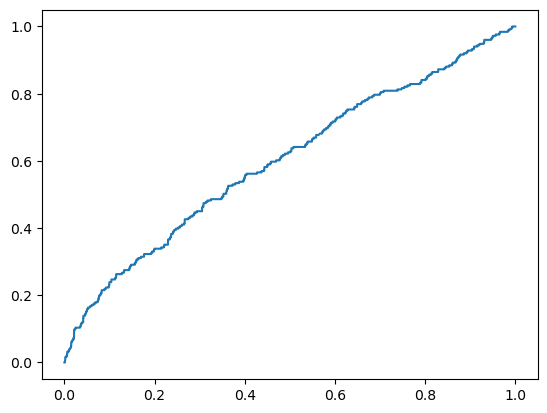

In [77]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model_3)

In [78]:
sub['target'] = new_model_3.predict(test)
sub.to_csv('sub_3.csv',index=False)

In [79]:
joblib.dump(new_model_3,'jobchg_pipeline_model.pkl')


['jobchg_pipeline_model.pkl']

In [80]:
import sklearn
print(sklearn.__version__)



1.5.1
